In [1]:
import sys

sys.path.insert(0, r"/mnt/c/Users/Trez/Desktop/tudat-bundle/tudatpy/")
from tudatpy.data.mpc import BatchMPC
from tudatpy.interface import spice

import numpy as np
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import os

from astroquery.mpc import MPC

import matplotlib.cm as cm
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable

import seaborn as sns
from typing import Union, Tuple

from tudatpy.data._biases import get_biases_EFCC18

spice.load_standard_kernels()

In [2]:
b = BatchMPC()
b.get_observations(["433"])


In [8]:
print(b.table.epochUTC.to_numpy())

['1893-10-29T09:55:00.479986000' '1893-10-31T08:17:57.119981000'
 '1893-11-01T09:21:01.439990000' ... '2024-04-12T19:10:43.622406000'
 '2024-04-12T19:15:49.824004000' '2024-04-12T19:20:56.198403000']


In [4]:
RA_original = b.table.RA
DEC_original = b.table.DEC
time_original = b.table.epochJ2000secondsTDB
catalogs = b.table.catalog
# print(b.table.groupby("catalog").count().sort_values("RA"))
# catalogs = [random.choice(["t", "a", "c"]) for _ in RA_original]

RA_corr, DEC_corr = get_biases_EFCC18(RA_original, DEC_original, time_original, catalogs)

RA_corrected = RA_original - RA_corr
DEC_corrected = DEC_original - DEC_corr

print(np.max(np.abs(RA_corr)))
print(np.max(np.abs(DEC_corr)))

7.111315948325313e-06
1.425927738390723e-05


In [5]:
print(get_biases_EFCC18([1.00, 0.525], [1.00, 0.525], [0, 200], ["a", "c"]))
print(
    get_biases_EFCC18([1.00, 0.525], [1.00, 0.525], [757382400, 757382400], ["a", "c"])
)
print(get_biases_EFCC18(1.00, 1.00, 0, "a"))
# print(get_biases_EFCC18(1.00, 0.545, 0, np.nan))

(array([3.94812344e-06, 7.45156970e-07]), array([-1.56110005e-06,  1.04234950e-06]))
(array([3.88351778e-06, 6.16071159e-07]), array([-1.49943175e-06,  1.35767223e-06]))
(array([3.94812344e-06]), array([-1.56110005e-06]))


/tmp/ipykernel_9506/1296761440.py:3: UserWarning: 
The palette list has fewer values (20) than needed (27) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(
/tmp/ipykernel_9506/1296761440.py:11: UserWarning: 
The palette list has fewer values (20) than needed (27) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


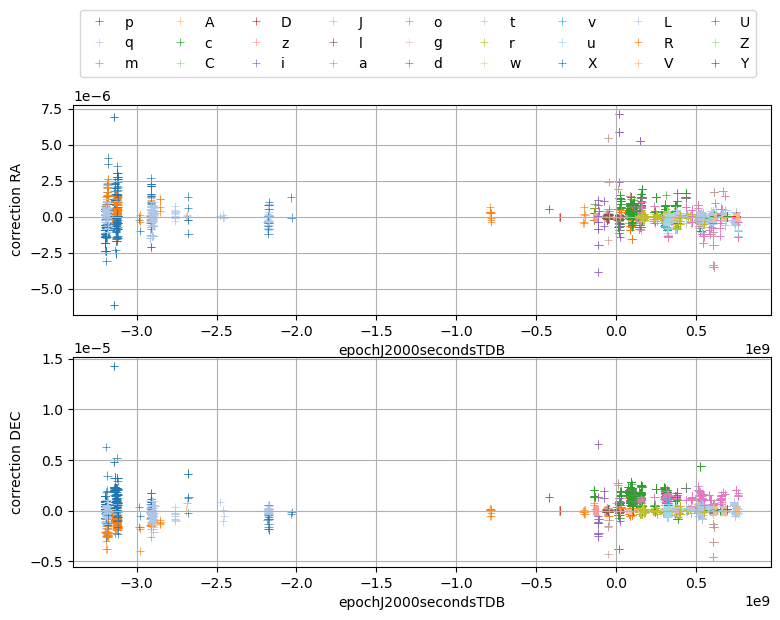

In [6]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(9, 6))

sns.scatterplot(
    x=time_original,
    y=RA_corr,
    marker="+",
    hue=catalogs,
    ax=ax1,
    palette=sns.color_palette("tab20"),
)
sns.scatterplot(
    x=time_original,
    y=DEC_corr,
    marker="+",
    hue=catalogs,
    ax=ax2,
    legend=False,
    palette=sns.color_palette("tab20"),
)
ax1.set_ylabel("correction RA")
ax2.set_ylabel("correction DEC")
ax1.legend(ncols=9, bbox_to_anchor=(0, 1.1), loc="lower left")
# ax2.legend()
ax1.grid()
ax2.grid()

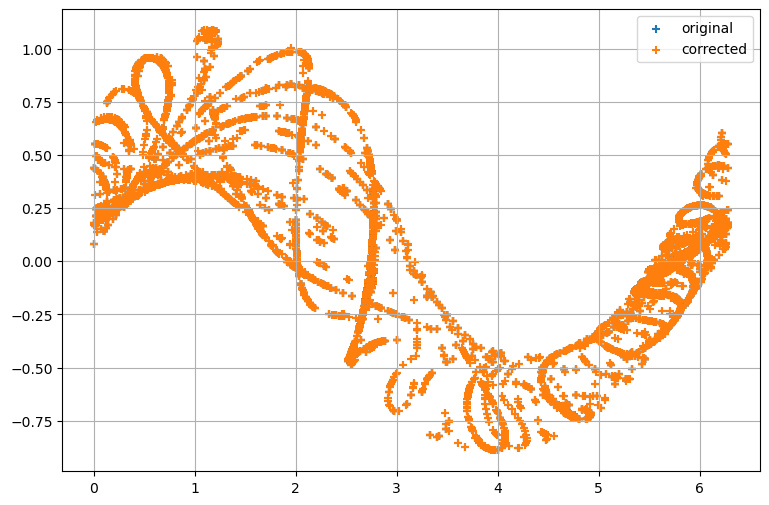

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(9, 6))

ax.scatter(RA_original, DEC_original, marker="+", label="original")
ax.scatter(RA_corrected, DEC_corrected, marker="+", label="corrected")
ax.legend()
ax.grid()